## **Android App Market Analysis**

## Loading the required libraries

In [ ]:
import pandas as pd
import numpy as np

#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [ ]:
app = pd.read_csv('apps.csv')
app.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
app.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9658,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## Data Preparation

In [ ]:
app.shape

(9659, 14)

That is, the data contains 9659 rows and 14 columns.

In [ ]:
app.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**Cleaning**

The variables 'Installs' and 'Price' have incorrect data type and also contain unwanted characters.So we correct the datatypes and remove those characters.

In [ ]:
#Remove the Unwanted characters

char_to_remove = ['+',',','$']
col_contain_char = ['Installs','Price']

for col in col_contain_char:
  for i in char_to_remove:
    app[col] = app[col].apply(lambda x:x.replace(i,''))

app.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Correct the data types**

In [ ]:
app['Installs'] = app['Installs'].astype('float')#Correcting the datatype of 'Installs' from object to float.
app['Price'] = app['Price'].astype('float')#Correcting the datatype of 'Installs' from object to float.

app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.0+ MB


## Category Exploration

**1.How apps are distributed among different categories in the dataset?**


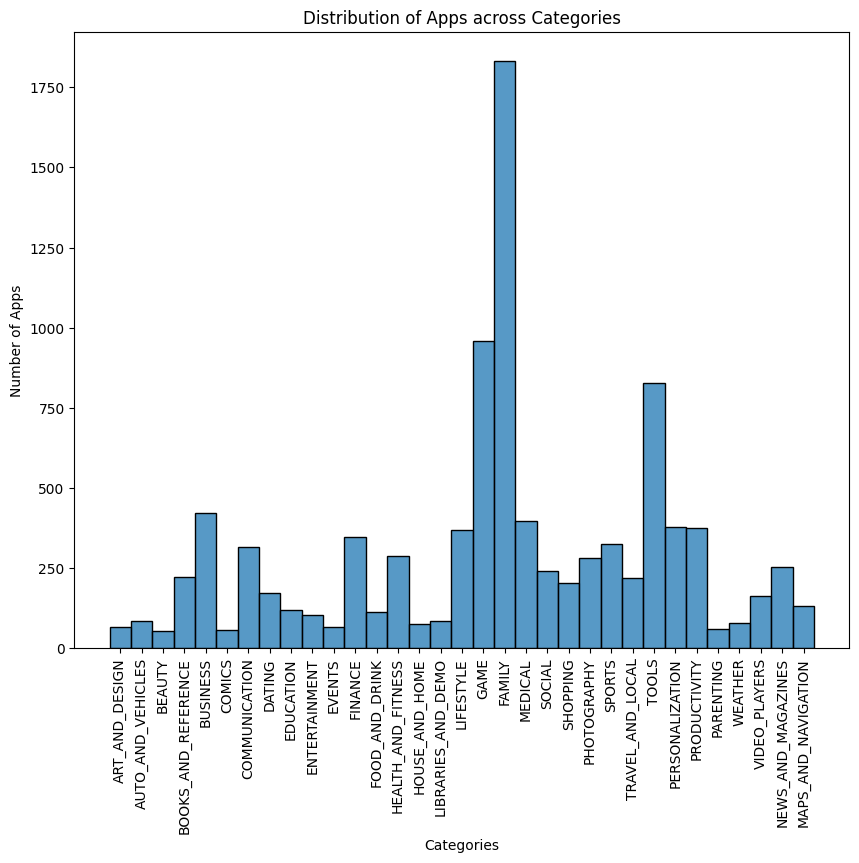

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=app,x='Category',kde=False)
plt.xlabel('Categories')
plt.ylabel('Number of Apps')
plt.title('Distribution of Apps across Categories')
plt.xticks(rotation=90)
plt.show()

**2.How many different App Categories are there in the dataset?**

In [ ]:
uniq_cat = app.Category.value_counts()
print('Category           Count')
print(uniq_cat)
print('Total number of categories :',len(uniq_cat))

Category           Count
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64
Total number of catego

*  There are 33 different App categories.
*  Family and Game category has highest number of apps.
*  Beauty category has lowest number of apps.






**3.What is the average rating of apps in each category?**

In [ ]:
print('Average Rating per Category :')
print(app.groupby('Category')['Rating'].mean())

Average Rating per Category :
Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
COMICS                 4.181481
COMMUNICATION          4.121484
DATING                 3.970149
EDUCATION              4.364407
ENTERTAINMENT          4.135294
EVENTS                 4.435556
FAMILY                 4.179664
FINANCE                4.115563
FOOD_AND_DRINK         4.172340
GAME                   4.247368
HEALTH_AND_FITNESS     4.243033
HOUSE_AND_HOME         4.150000
LIBRARIES_AND_DEMO     4.178125
LIFESTYLE              4.093355
MAPS_AND_NAVIGATION    4.036441
MEDICAL                4.166552
NEWS_AND_MAGAZINES     4.121569
PARENTING              4.300000
PERSONALIZATION        4.332215
PHOTOGRAPHY            4.157414
PRODUCTIVITY           4.183389
SHOPPING               4.230000
SOCIAL                 4.247291
SPORTS                 4.216154
TOOLS                  4.039554
T

**4.What is the distribution of app type(Free or Paid) within each category?**

<Figure size 1000x800 with 0 Axes>

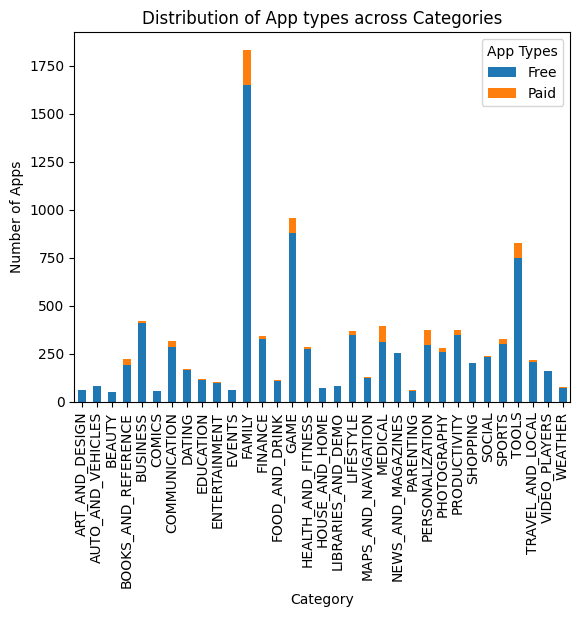

In [ ]:
app_type_dist = app.pivot_table(index='Category',columns='Type',aggfunc='size',fill_value=0)

plt.figure(figsize=(10,8))
app_type_dist.plot(kind='bar',stacked=True)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Distribution of App types across Categories')
plt.xticks(rotation=90)
plt.legend(title='App Types')

plt.show()

Majority of apps belong to Free Type across all Categories.

**5.What is the average number of reviews for Apps in each Category?**

Category
SOCIAL                 953672.807531
COMMUNICATION          907337.676190
GAME                   648903.763295
VIDEO_PLAYERS          414015.754601
PHOTOGRAPHY            374915.551601
ENTERTAINMENT          340810.294118
TOOLS                  277335.644498
SHOPPING               220553.118812
WEATHER                155634.987342
PRODUCTIVITY           148638.098930
PERSONALIZATION        142401.808511
MAPS_AND_NAVIGATION    135337.007634
TRAVEL_AND_LOCAL       122464.570776
EDUCATION              112303.764706
SPORTS                 108765.578462
NEWS_AND_MAGAZINES      91063.889764
FAMILY                  78507.362445
BOOKS_AND_REFERENCE     75321.234234
HEALTH_AND_FITNESS      74171.371528
FOOD_AND_DRINK          56473.464286
COMICS                  41822.696429
FINANCE                 36701.756522
LIFESTYLE               32066.859079
HOUSE_AND_HOME          26079.013514
BUSINESS                23548.202381
ART_AND_DESIGN          22175.046875
DATING                  21190

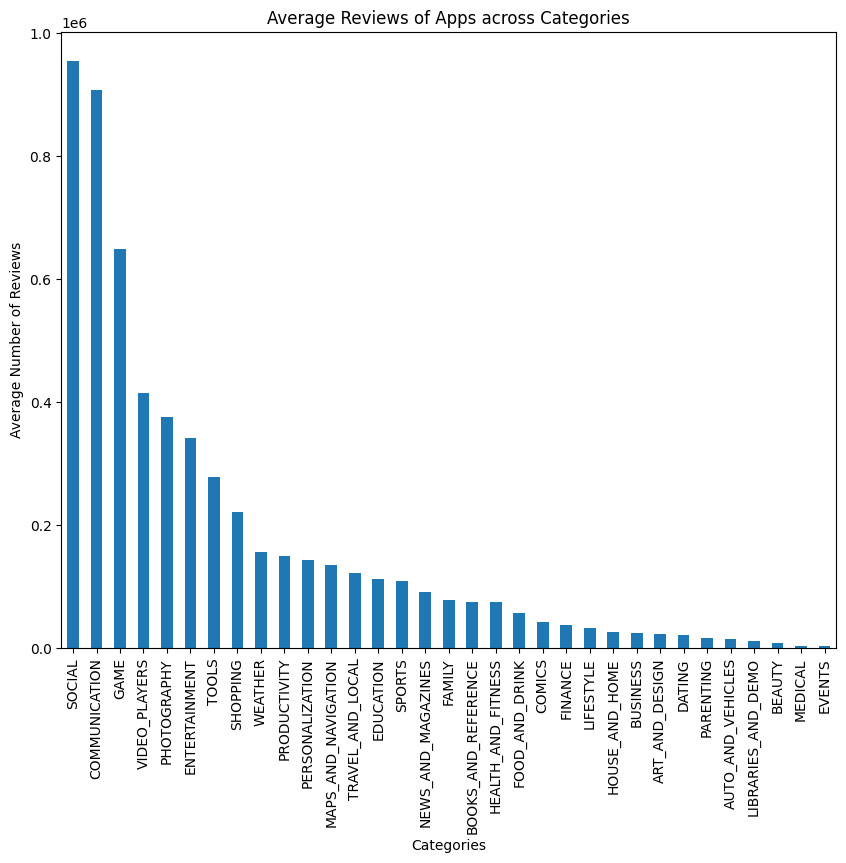

In [ ]:
av_review_by_cat = app.groupby('Category')['Reviews'].mean().sort_values(ascending=False)
print(av_review_by_cat)

plt.figure(figsize=(10,8))
av_review_by_cat.plot(kind='bar')
plt.title('Average Reviews of Apps across Categories')
plt.xlabel('Categories')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=90)
plt.show()

**6.Which are the top 5 Categories with highest number of installs?**

In [ ]:
tot_install_by_cat = app.groupby('Category')['Installs'].sum().sort_values(ascending=False)
print('Top 5 Categories with highest number of installs :\n',tot_install_by_cat.head(5))


Top 5 Categories with highest number of installs :
 Category
GAME             1.387892e+10
COMMUNICATION    1.103828e+10
TOOLS            8.001772e+09
PRODUCTIVITY     5.793091e+09
SOCIAL           5.487868e+09
Name: Installs, dtype: float64


**7.What is the distribution of App prices within each category?**

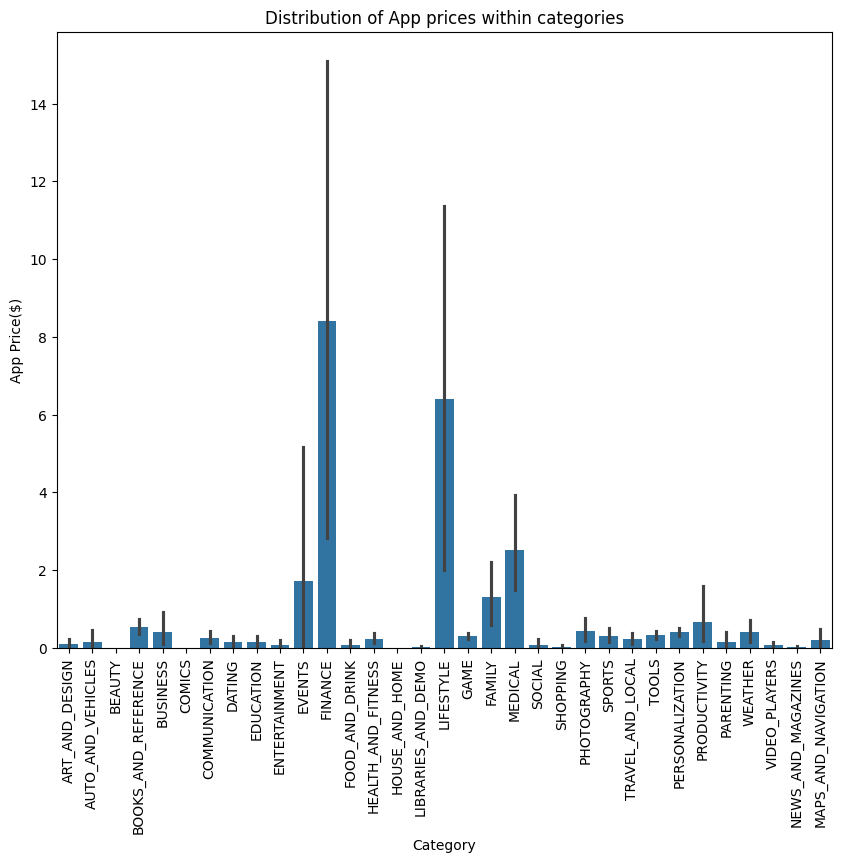

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=app,x='Category',y='Price')
plt.title('Distribution of App prices within categories')
plt.xlabel('Category')
plt.ylabel('App Price($)')
plt.xticks(rotation=90)
plt.show()

## Metrics Analysis

*Examine App ratings,size,popularity and pricing trends.*

Statistical Analysis of Rating:
 count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


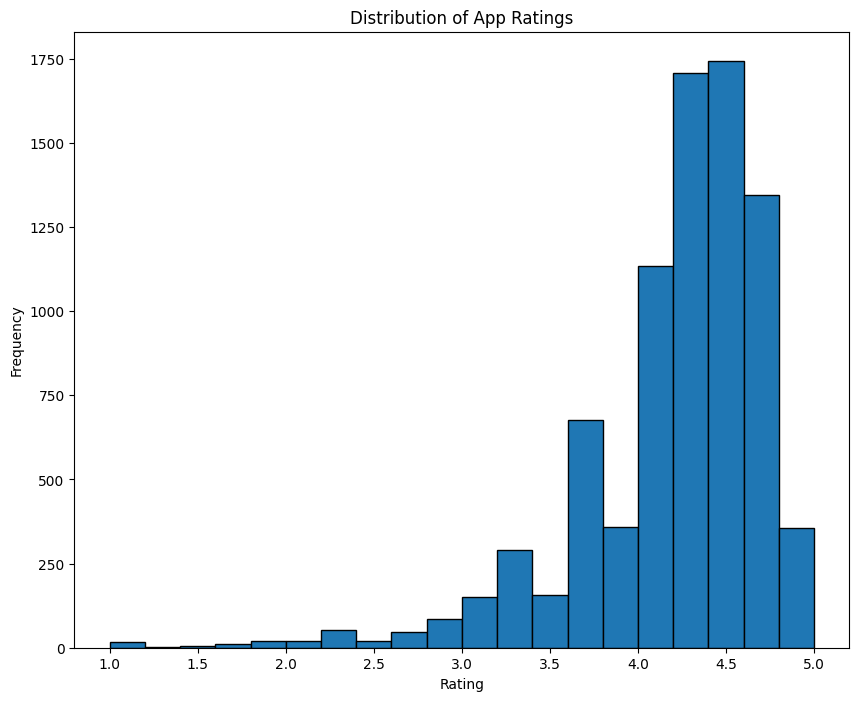

In [ ]:
#Rating Analysis
rating_sts = app['Rating'].describe()
print('Statistical Analysis of Rating:\n',rating_sts)

plt.figure(figsize=(10,8))
app.Rating.plot(kind='hist',bins=20,edgecolor='black')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Statistical Analysis of Size:
 count    8432.000000
mean       20.395327
std        21.827509
min         0.000000
25%         4.600000
50%        12.000000
75%        28.000000
max       100.000000
Name: Size, dtype: float64


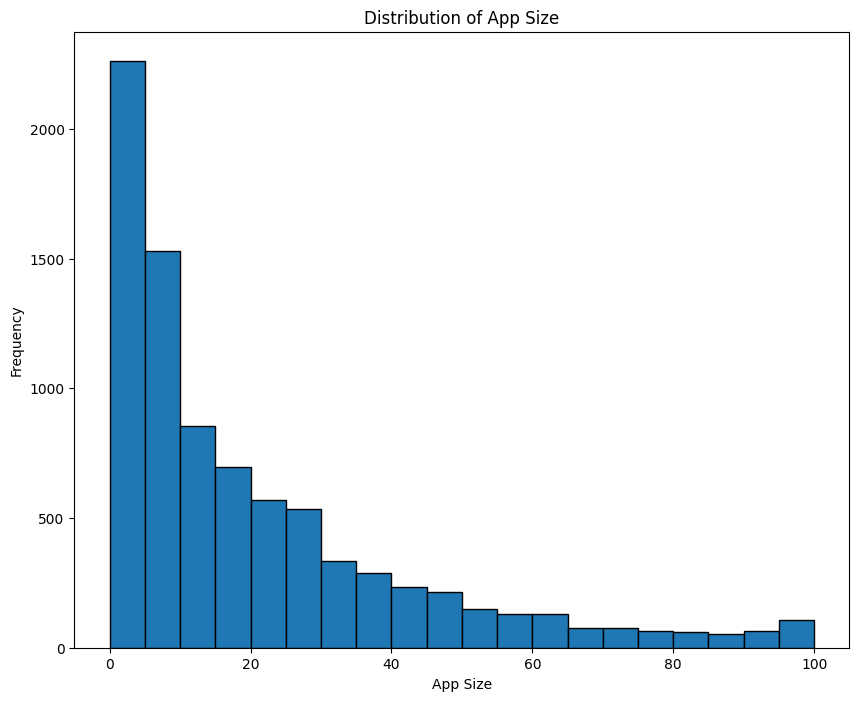

In [ ]:
#Size Analysis
size_sts = app['Size'].describe()
print('Statistical Analysis of Size:\n',size_sts)

plt.figure(figsize=(10,8))
app.Size.plot(kind='hist',bins=20,edgecolor='black')
plt.title('Distribution of App Size')
plt.xlabel('App Size')
plt.ylabel('Frequency')
plt.show()


Statistical Analysis of Installs:
 count    9.659000e+03
mean     7.777507e+06
std      5.375828e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64


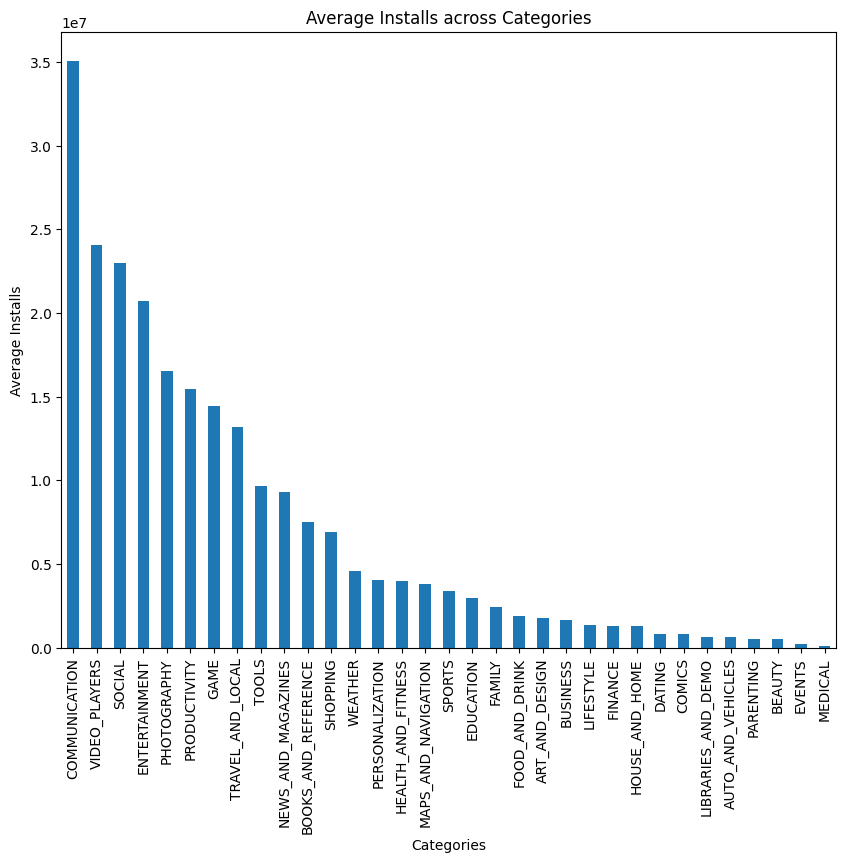

In [ ]:
#Popularity Analysis(Installs)
install_sts = app['Installs'].describe()
print('Statistical Analysis of Installs:\n',install_sts)

plt.figure(figsize=(10,8))
category_install_mean = app.groupby('Category')['Installs'].mean().sort_values(ascending=False)
category_install_mean.plot(kind='bar')
plt.title('Average Installs across Categories')
plt.xlabel('Categories')
plt.ylabel('Average Installs')
plt.xticks(rotation=90)
plt.show()



Statistical Analysis of Price:
 count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64


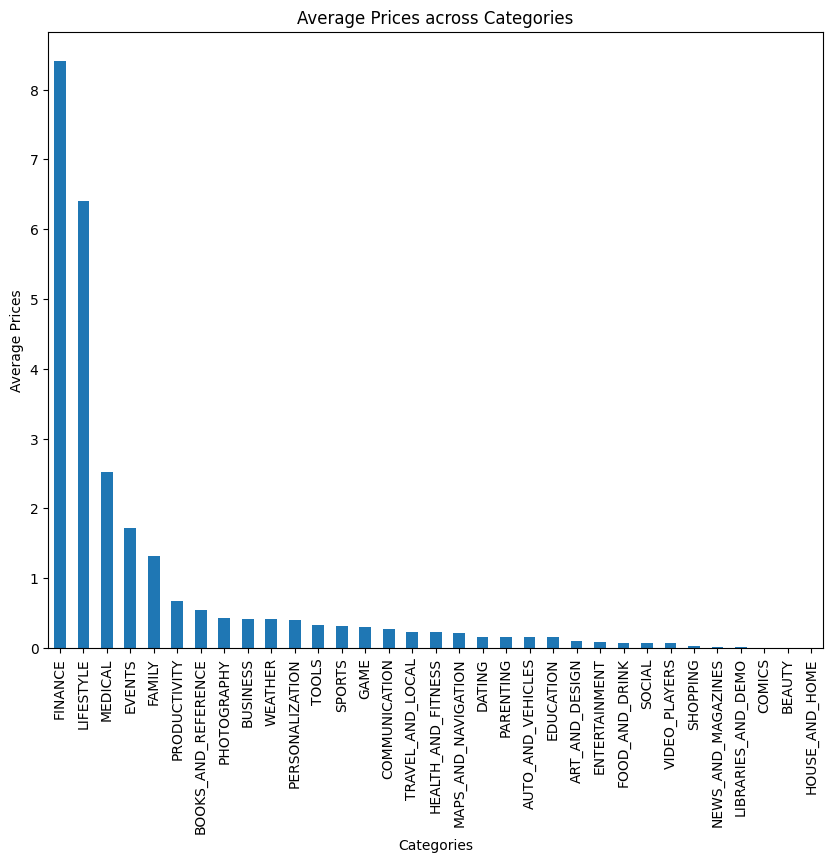

In [ ]:
#Price Analysis
price_sts = app['Price'].describe()
print('Statistical Analysis of Price:\n',price_sts)

plt.figure(figsize=(10,8))
category_price_mean = app.groupby('Category')['Price'].mean().sort_values(ascending=False)
category_price_mean.plot(kind='bar')
plt.title('Average Prices across Categories')
plt.xlabel('Categories')
plt.ylabel('Average Prices')
plt.xticks(rotation=90)
plt.show()

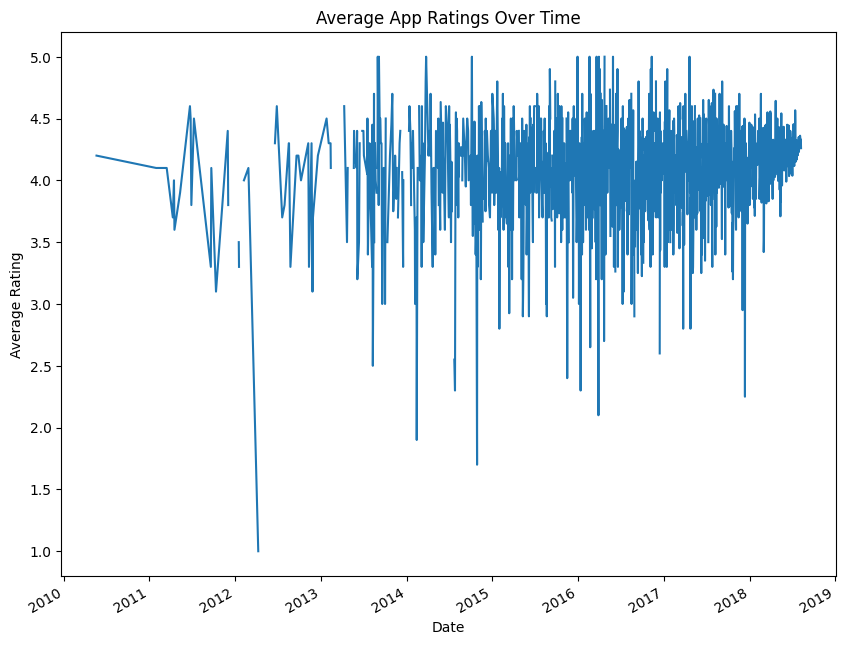

In [ ]:
#Trend Analysis
app['Last Updated']=pd.to_datetime(app['Last Updated'])

#Average App Ratings over time
ratings_over_time= app.groupby('Last Updated')['Rating'].mean()

plt.figure(figsize=(10,8))
ratings_over_time.plot()
plt.title('Average App Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()


## Sentiment Analysis

In [ ]:
user_review = pd.read_csv('user_reviews.csv')
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_review.shape


(64295, 5)

In [ ]:
#Join the two dataframes
merge_df = pd.merge(app,user_review,on='App')
merge_df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


Text(0.5, 1.0, 'Distribution of sentiment polarity')

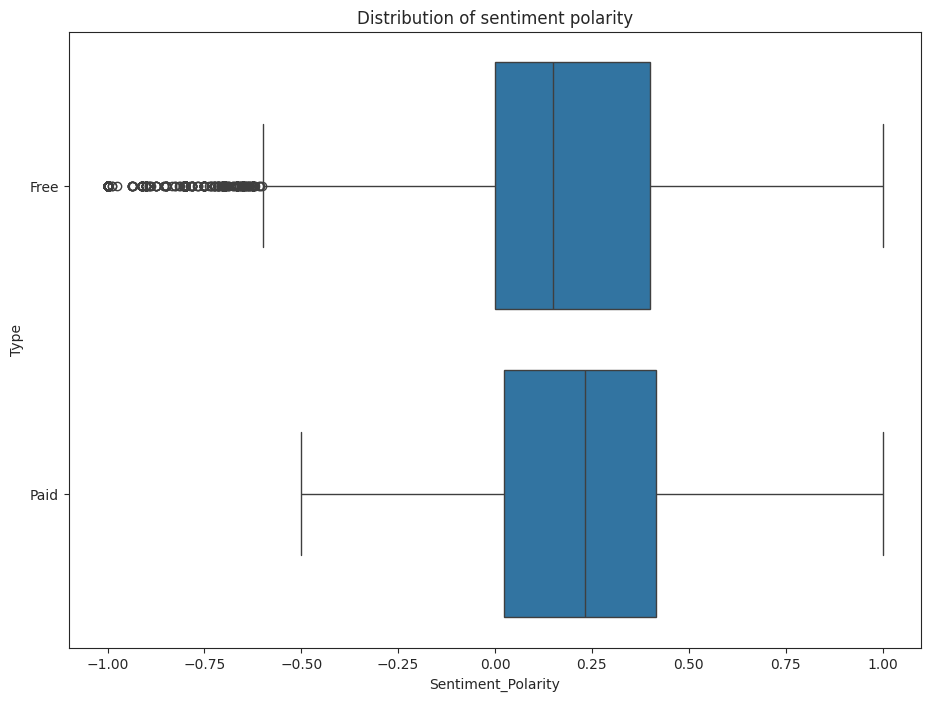

In [ ]:
merge_df=merge_df.dropna(subset=['Sentiment','Translated_Review'])

#Analyse the results
#User review sentiment polarity for paid vs. free apps
sns.set_style('ticks')
fig,ax = plt.subplots()
fig.set_size_inches(11,8)

ax = sns.boxplot(x='Sentiment_Polarity',y='Type',data=merge_df)
ax.set_title('Distribution of sentiment polarity')

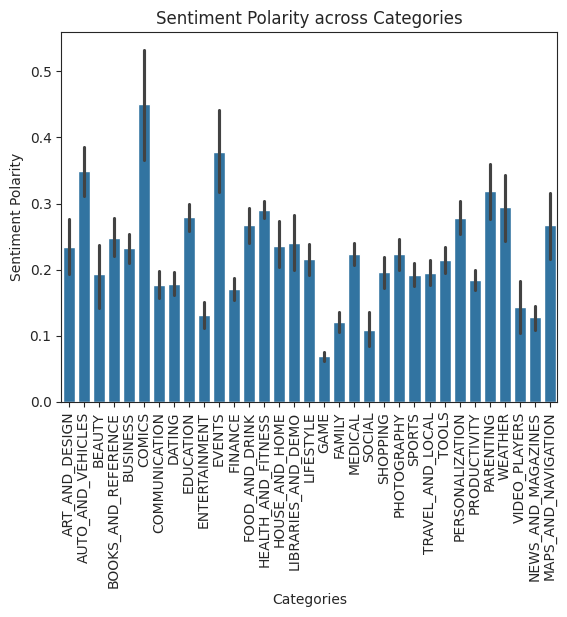

In [ ]:
sns.barplot(x='Category',y='Sentiment_Polarity',data=merge_df)
plt.xlabel('Categories')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity across Categories')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Distribution of sentiment polarity')

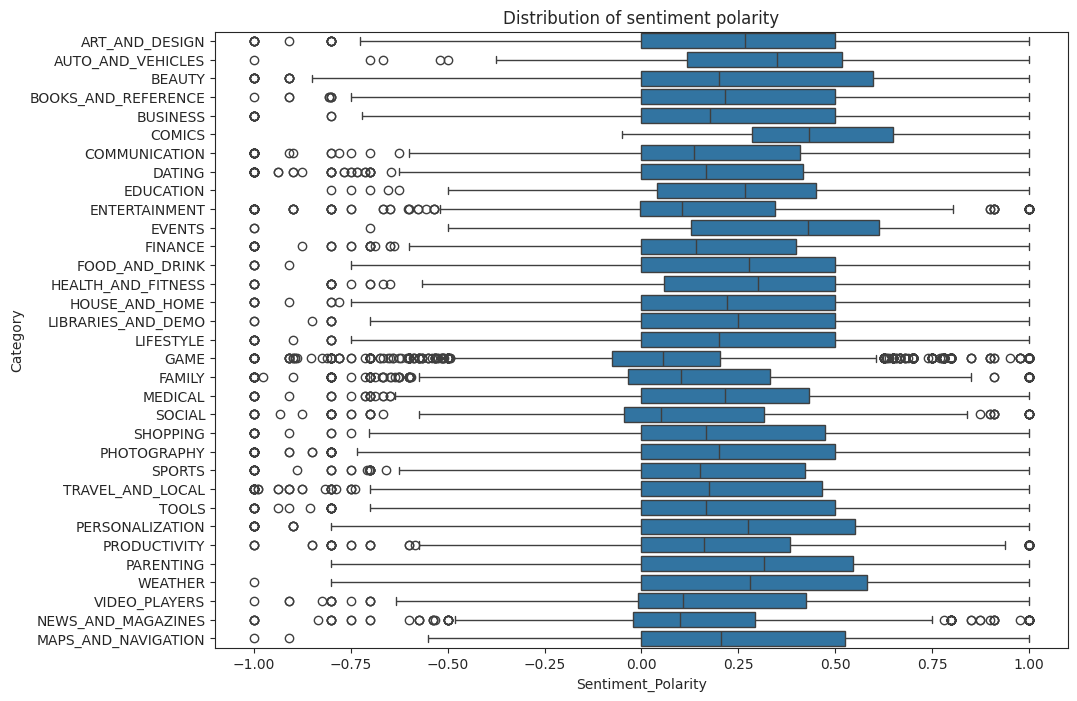

In [ ]:
sns.set_style('ticks')
fig,ax = plt.subplots()
fig.set_size_inches(11,8)

ax = sns.boxplot(x='Sentiment_Polarity',y='Category',data=merge_df)
ax.set_title('Distribution of sentiment polarity')